In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset

df = pd.read_csv('artvis_dataset.csv')
df.head(20)

,a.id,a.firstname,a.lastname,a.gender,a.birthdate,a.deathdate,a.birthplace,a.deathplace,a.nationality,e.id,e.title,e.venue,e.startdate,e.type,e.paintings,e.country,e.city,e.latitude,e.longitude
0,1,William Bernard,Adeney,M,1878-01-01,01-01-1966,London,London,GB,489,"Second Post-Impressionist Exhibition. British,...",Grafton Galleries,1912,group,4,GB,London,51.514248,-0.093145
1,1,William Bernard,Adeney,M,1878-01-01,01-01-1966,London,London,GB,618,Exhibition of the Camden Town Group and Others,Public Art Galleries,1913,group,6,GB,Brighton,50.833333,-0.15
2,1,William Bernard,Adeney,M,1878-01-01,01-01-1966,London,London,GB,720,The Second Exhibition of Works by Members of t...,Goupil Gallery,1915,group,4,GB,London,51.514248,-0.093145
3,1,William Bernard,Adeney,M,1878-01-01,01-01-1966,London,London,GB,729,Third Exhibition of Works by Members of the Lo...,Goupil Gallery,1915,group,5,GB,London,51.514248,-0.093145
4,1,William Bernard,Adeney,M,1878-01-01,01-01-1966,London,London,GB,650,The First Exhibition of Works by Members of Th...,Goupil Gallery,1914,group,5,GB,London,51.514248,-0.093145
5,1,William Bernard,Adeney,M,1878-01-01,01-01-1966,London,London,GB,680,Twentieth Century Art. A Review of Modern Move...,Whitechapel Art Gallery,1914,group,3,GB,London,51.514248,-0.093145
6,1,William Bernard,Adeney,M,1878-01-01,01-01-1966,London,London,GB,724,Vorticist Exhibition,Doré Gallery,1915,group,1,GB,London,51.514248,-0.093145
7,2,Peter,Alma,M,1886-01-01,01-01-1969,Medan,Amsterdam,NL,716,"Tentoonstelling Alma, Le Fauconnier en Mondrian",Rotterdamsche Kunstkring,1915,group,6,NL,Rotterdam,51.916667,4.5
8,2,Peter,Alma,M,1886-01-01,01-01-1969,Medan,Amsterdam,NL,490,Moderne Kunst Kring (Cercle de l'art moderne)....,Moderne Kunst Kring,1912,group,13,NL,Amsterdam,52.35,4.916667
9,2,Peter,Alma,M,1886-01-01,01-01-1969,Medan,Amsterdam,NL,609,Moderne Kunst Kring (Cercle de l'Art Moderne),Moderne Kunst Kring,1913,group,12,NL,Amsterdam,52.35,4.916667


In [52]:
# Combine 'a.firstname' and 'a.lastname' into 'a.name'
df['a.name'] = df['a.firstname'] + ' ' + df['a.lastname']

# Drop 'a.firstname' and 'a.lastname' columns
df = df.drop(columns=['a.firstname', 'a.lastname'])

column_order = ['a.name'] + [col for col in df.columns if col != 'a.name']
df = df[column_order]



In [53]:
# Replace '\N' with NaN across all elements in the DataFrame
df = df.applymap(lambda x: np.nan if x == '\\N' else x)

# Show the updated DataFrame
print("DataFrame after replacing '\\N' with NaN:")
print(df)

C:\Users\yashl\AppData\Local\Temp\ipykernel_21672\1460889465.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: np.nan if x == '\\N' else x)


DataFrame after replacing '\N' with NaN:
                       a.name   a.id a.gender a.birthdate a.deathdate  \
0      William Bernard Adeney      1        M  1878-01-01  01-01-1966   
1      William Bernard Adeney      1        M  1878-01-01  01-01-1966   
2      William Bernard Adeney      1        M  1878-01-01  01-01-1966   
3      William Bernard Adeney      1        M  1878-01-01  01-01-1966   
4      William Bernard Adeney      1        M  1878-01-01  01-01-1966   
...                       ...    ...      ...         ...         ...   
72073     Adam Emory Albright  13998        M  1862-01-01  01-01-1957   
72074           Anna Davidson  13999        F  0000-01-01  0000-01-01   
72075           Anna Davidson  13999        F  0000-01-01  0000-01-01   
72076           Anna Davidson  13999        F  0000-01-01  0000-01-01   
72077           Anna Davidson  13999        F  0000-01-01  0000-01-01   

      a.birthplace a.deathplace a.nationality  e.id  \
0           London       Lo

In [54]:
# Check if there are any NaN values in the entire DataFrame
has_nan = df.isnull().values.any()
print(f"Does the DataFrame contain any NaN values? {has_nan}")

# Check if there are NaN values in each column
nan_in_columns = df.isnull().any()
print("\nNaN values presence in each column:")
print(nan_in_columns)

# Check if there are NaN values in each row
nan_in_rows = df.isnull().any(axis=1)
print("\nNaN values presence in each row:")
print(nan_in_rows)

Does the DataFrame contain any NaN values? True

NaN values presence in each column:
a.name           False
a.id             False
a.gender          True
a.birthdate      False
a.deathdate      False
a.birthplace      True
a.deathplace      True
a.nationality     True
e.id             False
e.title          False
e.venue          False
e.startdate      False
e.type           False
e.paintings      False
e.country         True
e.city            True
e.latitude        True
e.longitude       True
dtype: bool

NaN values presence in each row:
0        False
1        False
2        False
3        False
4        False
         ...  
72073    False
72074     True
72075     True
72076     True
72077     True
Length: 72078, dtype: bool


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72078 entries, 0 to 72077
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   a.name         72078 non-null  object
 1   a.id           72078 non-null  int64 
 2   a.gender       71167 non-null  object
 3   a.birthdate    72078 non-null  object
 4   a.deathdate    72078 non-null  object
 5   a.birthplace   65412 non-null  object
 6   a.deathplace   61841 non-null  object
 7   a.nationality  67295 non-null  object
 8   e.id           72078 non-null  int64 
 9   e.title        72078 non-null  object
 10  e.venue        72078 non-null  object
 11  e.startdate    72078 non-null  int64 
 12  e.type         72078 non-null  object
 13  e.paintings    72078 non-null  int64 
 14  e.country      72072 non-null  object
 15  e.city         71833 non-null  object
 16  e.latitude     71833 non-null  object
 17  e.longitude    71833 non-null  object
dtypes: int64(4), object(14)
me

In [56]:
import pandas as pd

# Assuming your DataFrame is named df
# Step 1: Count occurrences of each city grouped by city and country
city_country_counts = df.groupby(['e.city', 'e.country']).size().reset_index(name='count')

# Step 2: Filter for cities with a count of at least 350
filtered_cities = city_country_counts[city_country_counts['count'] >= 500]

# Step 3: Sort the filtered cities by count in ascending order and select the least 10
least_cities = filtered_cities.sort_values(by='count', ascending=True).head(20)

# Display the result
print(least_cities)
print(city_country_counts)


              e.city e.country  count
0                  -        DE    646
45           Leipzig        DE    649
32             Ghent        BE    730
11            Bremen        DE    811
52             Milan        IT    816
66              Rome        IT    824
56          New York        US    949
27        Dusseldorf        DE    963
53            Moscow        RU   1323
21           Cologne        DE   1329
62        Pittsburgh        US   1472
69  Saint Petersburg        RU   1536
63            Prague        CZ   1830
14          Brussels        BE   2404
15          Budapest        HU   4096
79            Vienna        AT   4771
78            Venice        IT   5278
61             Paris        FR   5421
1          Amsterdam        NL   6110
7             Berlin        DE   6143
       e.city e.country  count
0           -        DE    646
1   Amsterdam        NL   6110
2      Angers        FR    200
3     Antwerp        BE    385
4      Arnhem        NL    428
..        ...   

In [ ]:

# Step 2: Filter the data where 'e.city' is "London"
filtered_df = df[df['e.city'] == 'London'][['a.name', 'e.latitude', 'e.longitude', 'e.city','e.type','e.startdate']]


# Step 5: Save the filtered table to a new CSV file
filtered_df.to_csv("event_details.csv", index=False)

# Optionally, display the first few rows of the filtered table
filtered_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 8136 entries, 0 to 72041
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   a.name       8136 non-null   object
 1   e.latitude   8136 non-null   object
 2   e.longitude  8136 non-null   object
 3   e.city       8136 non-null   object
 4   e.type       8136 non-null   object
 5   e.startdate  8136 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 444.9+ KB


In [57]:
# Parse dates and extract years as integers
df['a.birth_year'] = pd.to_datetime(df['a.birthdate'], errors='coerce').dt.year
df['a.death_year'] = pd.to_datetime(df['a.deathdate'], errors='coerce').dt.year

# Drop rows with NaN values in the important columns (birth_year, death_year, or gender)
df = df.dropna(subset=['a.birth_year', 'a.death_year', 'a.gender'])


# Filter the desired columns
filtered_df = df[['a.name', 'a.birth_year', 'a.death_year', 'a.gender']]

# Remove duplicate rows
filtered_df = filtered_df.drop_duplicates()

# Save to CSV
filtered_df.to_csv('artist_birth_death.csv', index=False)


In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('artist_birth_death.csv')
df.head(20)


,a.name,a.birth_year,a.death_year,a.gender
0,William Bernard Adeney,1878.0,1966.0,M
1,Peter Alma,1886.0,1969.0,M
2,Natan Alt'man,1889.0,1970.0,M
3,Cuno Amiet,1868.0,1961.0,M
4,Vassily Kandinsky,1866.0,1944.0,M
5,Kazimir Malevich,1878.0,1935.0,M
6,Piet Mondrian,1872.0,1944.0,M
7,Alexander Archipenko,1887.0,1964.0,M
8,Hans Arp,1886.0,1966.0,M
9,Lawrence Atkinson,1873.0,1931.0,M


In [8]:
# Sort the DataFrame by 'birth_year' in ascending order
df_sorted = df1.sort_values(by='birth_year', ascending=True)

# Display the sorted DataFrame
df_sorted.head(30) # Display the first 20 rows


NameError: name 'df1' is not defined

In [65]:
# Filter the DataFrame for people born in 1999
born_in_1999 = df1[df1['death_year'] == 1900]


In [66]:
# Count the number of people
count_1999 = len(born_in_1999)

print(f"Number of people born in 1999: {count_1999}")

Number of people born in 1999: 25


In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72078 entries, 0 to 72077
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   a.name         72078 non-null  object 
 1   a.id           72078 non-null  int64  
 2   a.gender       71167 non-null  object 
 3   a.birthdate    72078 non-null  object 
 4   a.deathdate    72078 non-null  object 
 5   a.birthplace   65412 non-null  object 
 6   a.deathplace   61841 non-null  object 
 7   a.nationality  67295 non-null  object 
 8   e.id           72078 non-null  int64  
 9   e.title        72078 non-null  object 
 10  e.venue        72078 non-null  object 
 11  e.startdate    72078 non-null  int64  
 12  e.type         72078 non-null  object 
 13  e.paintings    72078 non-null  int64  
 14  e.country      72072 non-null  object 
 15  e.city         71833 non-null  object 
 16  e.latitude     71833 non-null  float64
 17  e.longitude    71833 non-null  float64
 18  a.birt

In [76]:
# Step 1: Fetch all unique artists
unique_artists = df['a.name'].unique()

# Step 2: Extract birth and death years
# Convert birthdate and deathdate to datetime
df['a.birthdate'] = pd.to_datetime(df['a.birthdate'], errors='coerce')  # Handle invalid dates
df['a.deathdate'] = pd.to_datetime(df['a.deathdate'], errors='coerce')

# Extract year from birthdate and deathdate
df['birth_year'] = df['a.birthdate'].dt.year
df['death_year'] = df['a.deathdate'].dt.year

# Step 3: Fetch birth and death years for unique artists
artist_birth_death = df[['a.name', 'birth_year', 'death_year','a.gender']].drop_duplicates().dropna()
artist_birth_death.to_csv('artist_birth_death.csv', index=False)



In [19]:


# Step 3: Fetch birth and death years for unique artists
event_details= df[['a.name', 'e.latitude', 'e.longitude','e.type','e.title','e.startdate','e.city']].dropna()
event_details.to_csv('event_details.csv',index=False)



In [47]:
# Load dataset
df = pd.read_csv('event_details.csv')
df.head(20)

,a.name,e.latitude,e.longitude,e.city,e.type,e.startdate
0,William Bernard Adeney,51.514248,-0.093145,London,group,1912
1,William Bernard Adeney,51.514248,-0.093145,London,group,1915
2,William Bernard Adeney,51.514248,-0.093145,London,group,1915
3,William Bernard Adeney,51.514248,-0.093145,London,group,1914
4,William Bernard Adeney,51.514248,-0.093145,London,group,1914
5,William Bernard Adeney,51.514248,-0.093145,London,group,1915
6,Vassily Kandinsky,51.514248,-0.093145,London,group,1909
7,Vassily Kandinsky,51.514248,-0.093145,London,group,1909
8,Lawrence Atkinson,51.514248,-0.093145,London,group,1915
9,Lawrence Atkinson,51.514248,-0.093145,London,group,1912


In [24]:
import pandas as pd

# Load the dataset
df = pd.read_csv('event_details.csv')

# Filter rows where e.city is Munich, London, or Berlin
filtered_data = df[df['e.city'].isin(['London'])]

# Select relevant columns and drop rows with missing values
event_details = filtered_data[['a.name', 'e.latitude', 'e.longitude', 'e.type', 'e.title', 'e.startdate', 'e.city']]

# Save to a new CSV file
event_details.to_csv('event_details.csv', index=False)


In [30]:
country_counts = df['e.country'].value_counts()

print("Count of all countries:")
print(country_counts)



Count of all countries:
e.country
DE    20529
GB     8697
IT     7031
NL     6691
FR     6358
AT     4771
HU     4096
BE     3615
RU     2887
US     2687
CZ     2279
UA      923
CH      507
SE      492
LV      414
PL       40
JP       26
LT       17
ES        8
NO        4
Name: count, dtype: int64


In [37]:
us_cities_counts = df[df['e.country'] == 'CZ']['e.city'].value_counts()

print("City names and their counts for the US:")
print(us_cities_counts)


City names and their counts for the US:
e.city
Prague               1830
Hodonín               282
Kladno                 52
Olomouc                37
Valašské Meziříčí      28
Kroměříž               27
Chrudim                20
Prostějov               2
Hradec Králové          1
Name: count, dtype: int64


In [23]:
import pandas as pd
import time
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut

# Load your dataset
df = pd.read_csv('unique_names.csv')

# Initialize geocoder
geolocator = Nominatim(user_agent="artist_geocoder")

# Initialize a cache to store already geocoded locations
geocoded_cache = {}

# Function to geocode a location
def geocode_location(location):
    if location in geocoded_cache:
        return geocoded_cache[location]  # Return cached result if available
    
    try:
        location_data = geolocator.geocode(location, timeout=20)  # Increase timeout
        if location_data:
            geocoded_cache[location] = (location_data.latitude, location_data.longitude)
            return location_data.latitude, location_data.longitude
    except GeocoderTimedOut:
        time.sleep(2)  # Retry after a longer delay
        return geocode_location(location)  # Recursive call
    except GeocoderUnavailable:
        print(f"Service unavailable for {location}. Skipping...")
        return None, None
    except Exception as e:
        print(f"Error geocoding {location}: {str(e)}")
        return None, None
    
    geocoded_cache[location] = (None, None)  # Cache missing location as None
    return None, None

# Apply geocoding in parallel using ThreadPoolExecutor
def apply_geocoding_parallel(df, column_name):
    with ThreadPoolExecutor() as executor:
        result = list(executor.map(geocode_location, df[column_name]))
    return zip(*result)

# Geocode birthplaces and deathplaces in parallel
df['birth_lat'], df['birth_lon'] = apply_geocoding_parallel(df, 'a.birthplace')
df['death_lat'], df['death_lon'] = apply_geocoding_parallel(df, 'a.deathplace')

# Save the updated DataFrame with latitude and longitude to the same CSV
df.to_csv("unique_names.csv", index=False)

# Load the updated CSV to verify the changes
df2 = pd.read_csv('unique_names.csv')

# Check the first few rows of the up


NameError: name 'ThreadPoolExecutor' is not defined

In [17]:
pip install geopy


   ---------------------------------------- 0.0/125.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/125.4 kB ? eta -:--:--
   --- ------------------------------------ 10.2/125.4 kB ? eta -:--:--
   ------------ -------------------------- 41.0/125.4 kB 393.8 kB/s eta 0:00:01
   ---------------------------------------  122.9/125.4 kB 1.0 MB/s eta 0:00:01
   -------------------------------------- 125.4/125.4 kB 921.6 kB/s eta 0:00:00
   ---------------------------------------- 0.0/40.3 kB ? eta -:--:--
   ---------------------------------------- 40.3/40.3 kB 2.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [7]:
# Assuming there is a column 'e.artist' that contains the artist names or IDs
number_of_artists = df['a.name'].nunique()

# Print the number of unique artists
print(f"Number of unique artists: {number_of_artists}")


Number of unique artists: 13266


In [8]:
# Assuming there is a column 'e.artist' that contains the artist names or IDs
number_of_artists = df['e.country'].nunique()
number_of_artists


20

In [ ]:
# Assuming there is a column 'e.artist' that contains the artist names or IDs
number_of_artists = df['a.name'].nunique()
number_of_artists

In [9]:
# Assuming there is a column 'e.artist' that contains the artist names or IDs
number_of_artists = df['e.title'].nunique()
number_of_artists


1007

In [10]:
# Assuming there is a column 'e.artist' that contains the artist names or IDs
number_of_artists = df['e.paintings'].nunique()
number_of_artists


158

In [11]:
# Assuming there is a column 'e.artist' that contains the artist names or IDs
number_of_artists = df['e.city'].nunique()
number_of_artists


83

In [12]:
# Assuming there is a column 'e.artist' that contains the artist names or IDs
number_of_artists = df['e.venue'].nunique()
number_of_artists


315

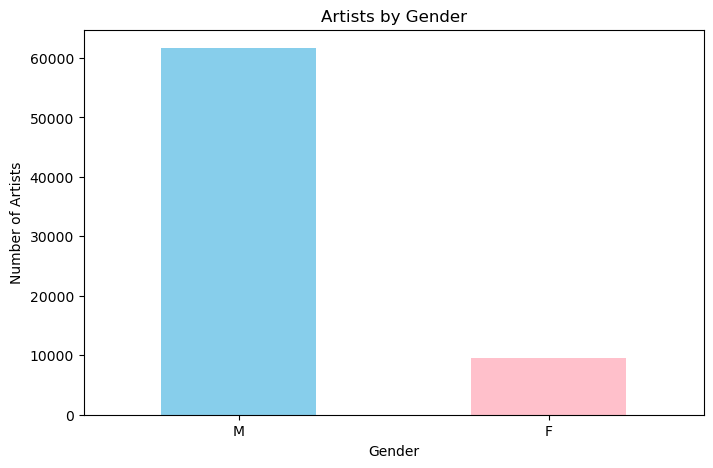

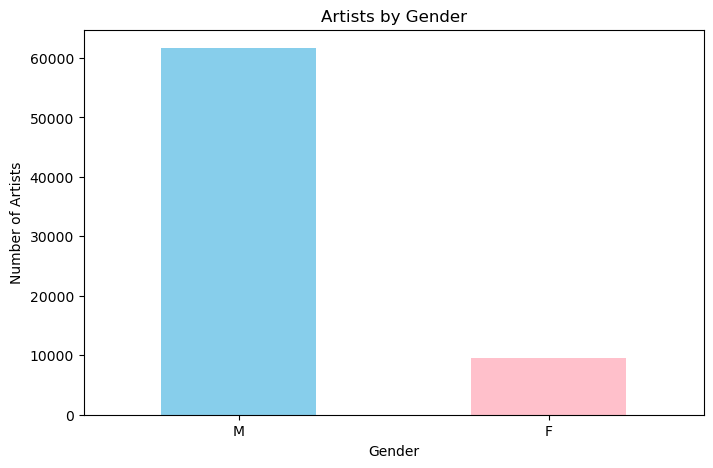

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'e.startdate' is converted to a datetime object, if not already
df['e.startdate'] = pd.to_datetime(df['e.startdate'], errors='coerce')

# Gender Distribution
gender_counts = df['a.gender'].value_counts()

# Plot
plt.figure(figsize=(8, 5))
gender_counts.plot(kind='bar', color=['skyblue', 'pink'])
plt.title('Artists by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Artists')
plt.xticks(rotation=0)
plt.show()
import pandas as pd
import matplotlib.pyplot as plt


# Gender Distribution
gender_counts = df['a.gender'].value_counts()

# Plot
plt.figure(figsize=(8, 5))
gender_counts.plot(kind='bar', color=['skyblue', 'pink'])
plt.title('Artists by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Artists')
plt.xticks(rotation=0)
plt.show()


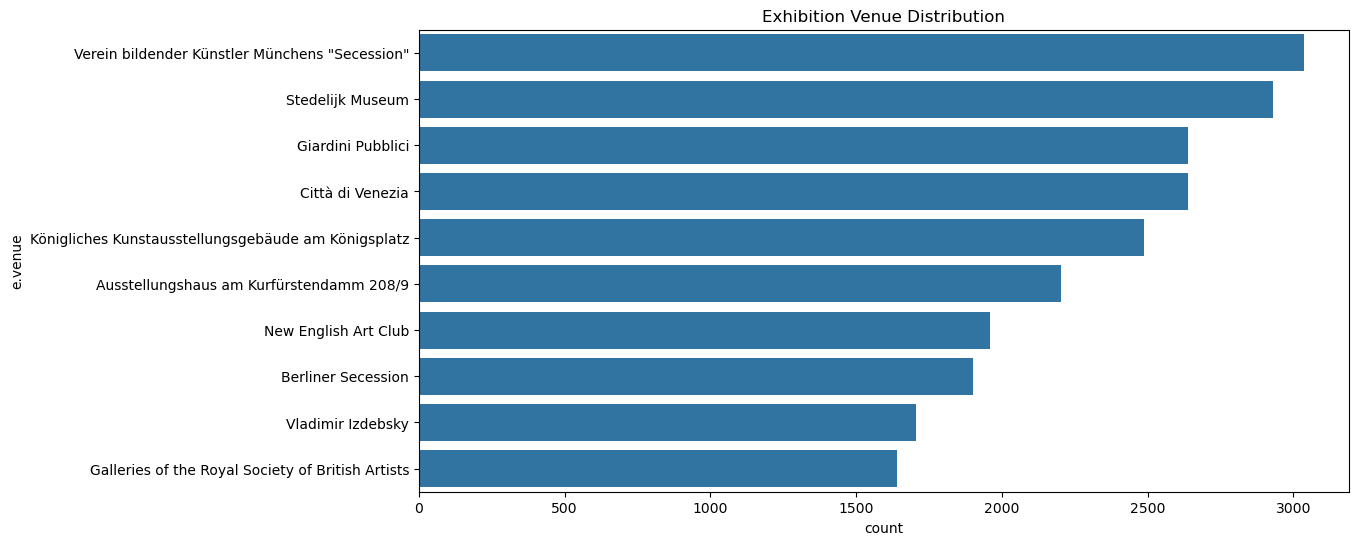

In [14]:
# Exhibition venue distribution
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.countplot(y='e.venue', data=df, order=df['e.venue'].value_counts().index[:10])  # Top 10 venues
plt.title('Exhibition Venue Distribution')
plt.show()

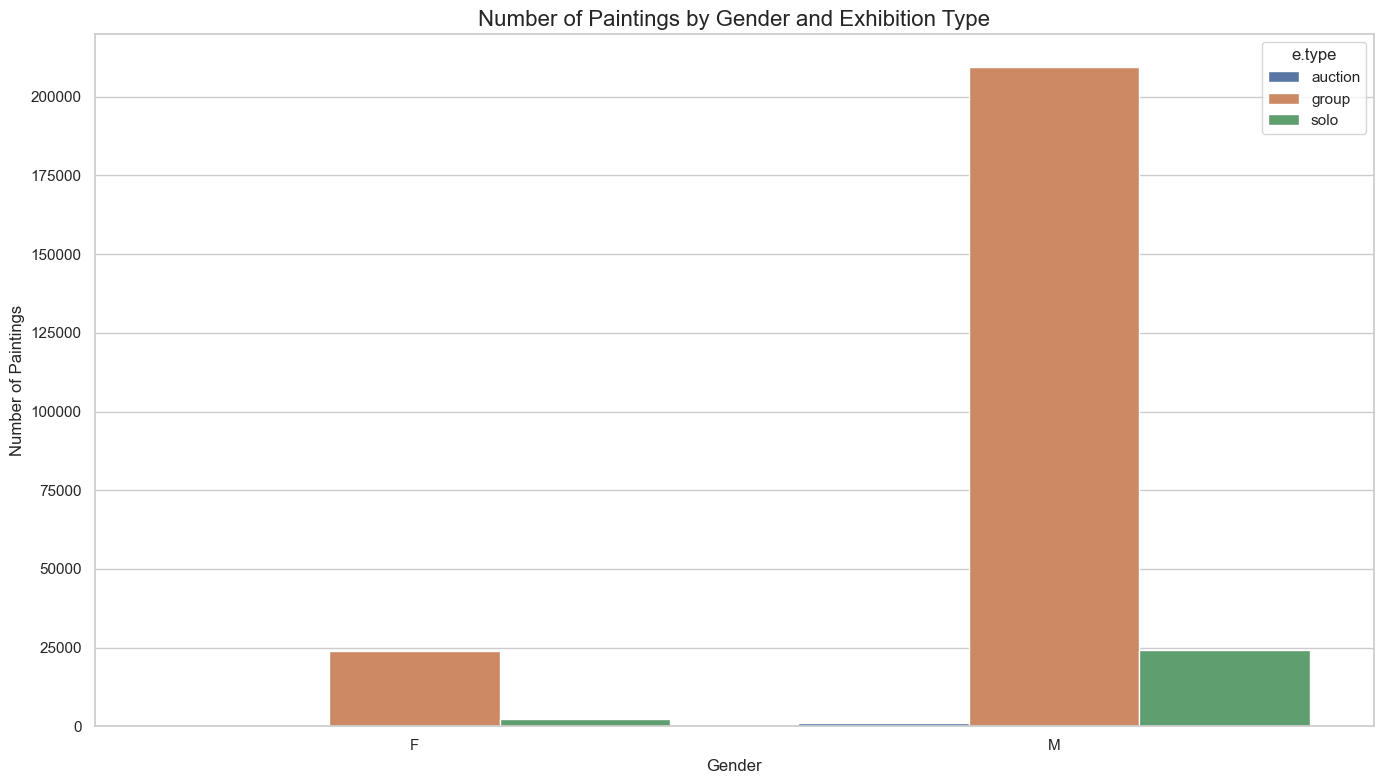

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'a.gender', 'e.type', and sum 'e.paintings'
gender_type_paintings = df.groupby(['a.gender', 'e.type'])['e.paintings'].sum().reset_index()

# Set the seaborn style for the plot
sns.set(style="whitegrid")

# Set the plot size
plt.figure(figsize=(14, 8))

# Create a grouped bar plot
sns.barplot(data=gender_type_paintings, x='a.gender', y='e.paintings', hue='e.type')

# Customize the plot
plt.title('Number of Paintings by Gender and Exhibition Type', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Number of Paintings', fontsize=12)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=0)

# Show the plot
plt.tight_layout()
plt.show()


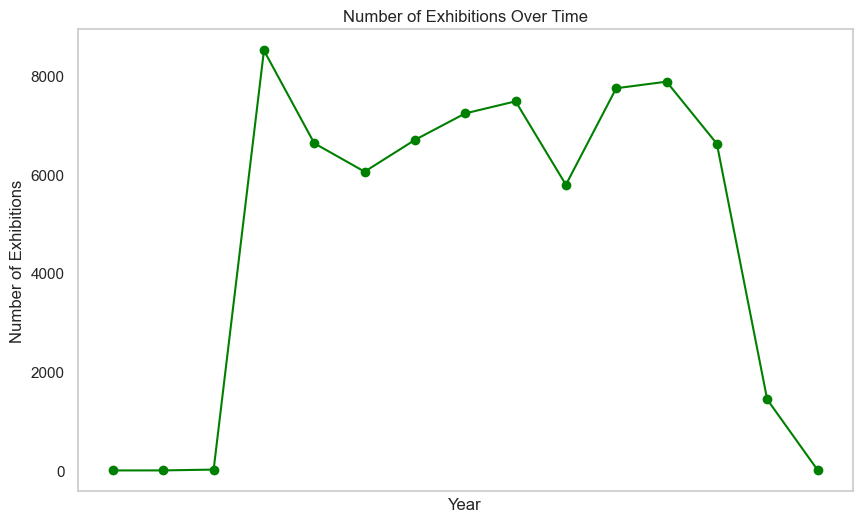

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'e.startdate' is converted to a datetime object
df['e.startdate'] = pd.to_datetime(df['e.startdate'], errors='coerce')



# Group by year
exhibitions_by_year = df.groupby('e.startdate').size()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(exhibitions_by_year.index, exhibitions_by_year.values, marker='o', color='green')
plt.title('Number of Exhibitions Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Exhibitions')
plt.grid()
plt.show()


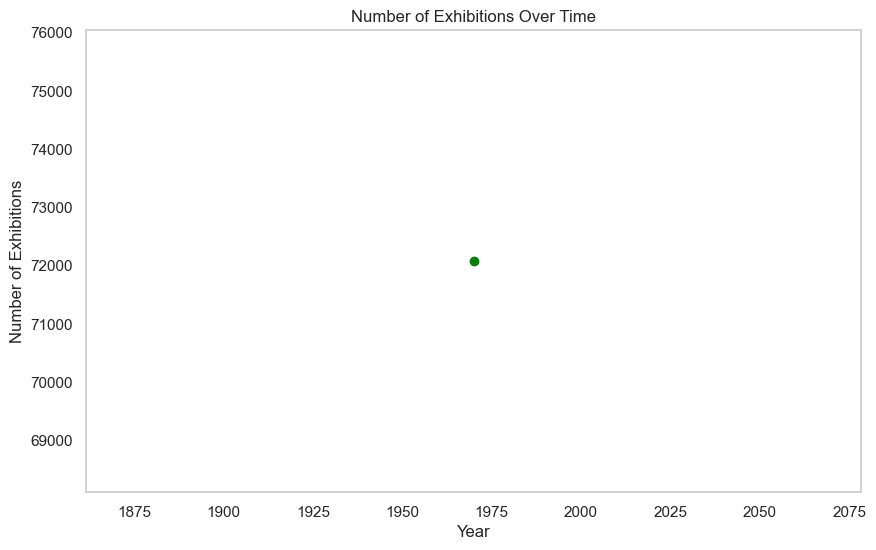

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and e.startdate contains the date of each exhibition
df['e.startdate'] = pd.to_datetime(df['e.startdate'], errors='coerce')

# Extract the year from the 'e.startdate' and count the number of exhibitions per year
exhibitions_by_year = df['e.startdate'].dt.year.value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(exhibitions_by_year.index, exhibitions_by_year.values, marker='o', color='green')
plt.title('Number of Exhibitions Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Exhibitions')
plt.grid()
plt.show()


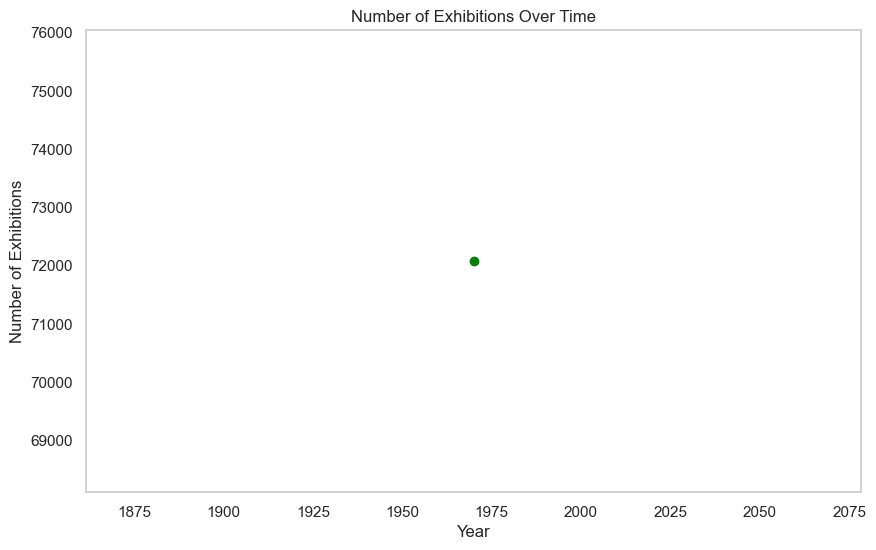

In [18]:
# Extract year from exhibition date
df['e.year'] = pd.to_datetime(df['e.startdate'], errors='coerce').dt.year

# Group by year
exhibitions_by_year = df.groupby('e.year').size()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(exhibitions_by_year.index, exhibitions_by_year.values, marker='o', color='green')
plt.title('Number of Exhibitions Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Exhibitions')
plt.grid()
plt.show()


In [19]:
print(df['e.startdate'].isna().sum())  # Count missing dates
print(df['e.startdate'].unique())     # Check unique values


0
<DatetimeArray>
['1970-01-01 00:00:00.000001912', '1970-01-01 00:00:00.000001913',
 '1970-01-01 00:00:00.000001915', '1970-01-01 00:00:00.000001914',
 '1970-01-01 00:00:00.000001916', '1970-01-01 00:00:00.000001910',
 '1970-01-01 00:00:00.000001911', '1970-01-01 00:00:00.000001909',
 '1970-01-01 00:00:00.000001907', '1970-01-01 00:00:00.000001906',
 '1970-01-01 00:00:00.000001905', '1970-01-01 00:00:00.000001908',
 '1970-01-01 00:00:00.000001904', '1970-01-01 00:00:00.000001902',
 '1970-01-01 00:00:00.000001903']
Length: 15, dtype: datetime64[ns]


In [20]:
print(df['e.year'].unique())  # List unique years


[1970]


In [21]:
print(exhibitions_by_year)


e.year
1970    72078
dtype: int64


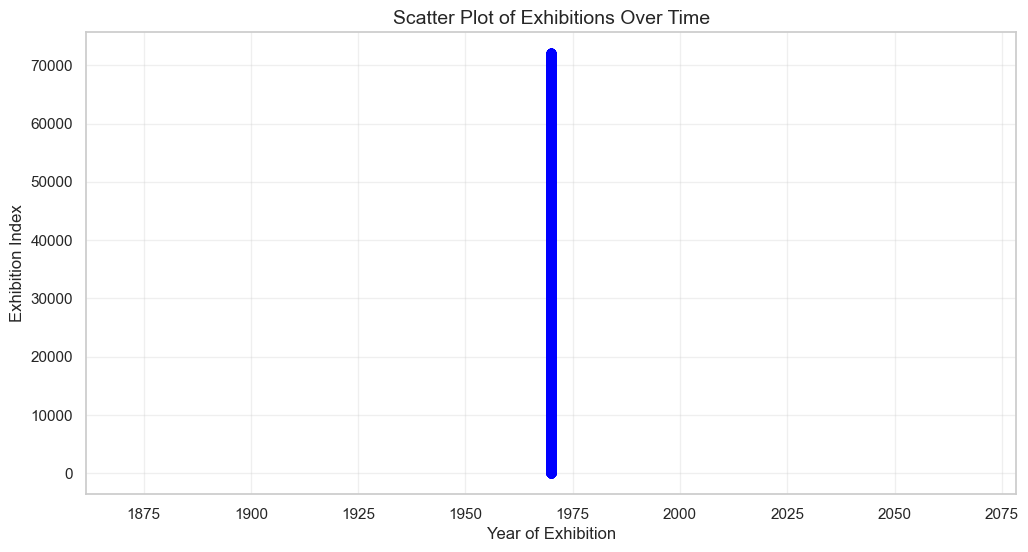

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract year from exhibition date
df['e.year'] = pd.to_datetime(df['e.startdate'], errors='coerce').dt.year

# Drop rows where year is NaN (optional if invalid data exists)
df = df.dropna(subset=['e.year'])

# Plot the data as individual points
plt.figure(figsize=(12, 6))
plt.scatter(df['e.year'], range(len(df)), color='blue', alpha=0.7)

# Customize the plot
plt.title('Scatter Plot of Exhibitions Over Time', fontsize=14)
plt.xlabel('Year of Exhibition', fontsize=12)
plt.ylabel('Exhibition Index', fontsize=12)
plt.grid(alpha=0.3)
plt.show()


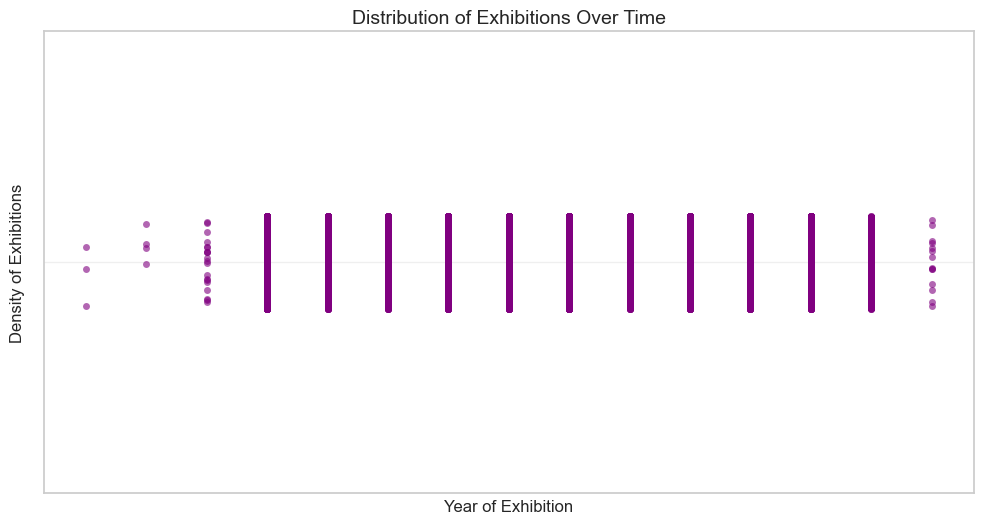

In [23]:
import seaborn as sns

# Strip plot to visualize exhibition density over time
plt.figure(figsize=(12, 6))
sns.stripplot(x='e.startdate', data=df, jitter=True, color='purple', alpha=0.6)

# Customize the plot
plt.title('Distribution of Exhibitions Over Time', fontsize=14)
plt.xlabel('Year of Exhibition', fontsize=12)
plt.ylabel('Density of Exhibitions', fontsize=12)
plt.grid(alpha=0.3)
plt.show()


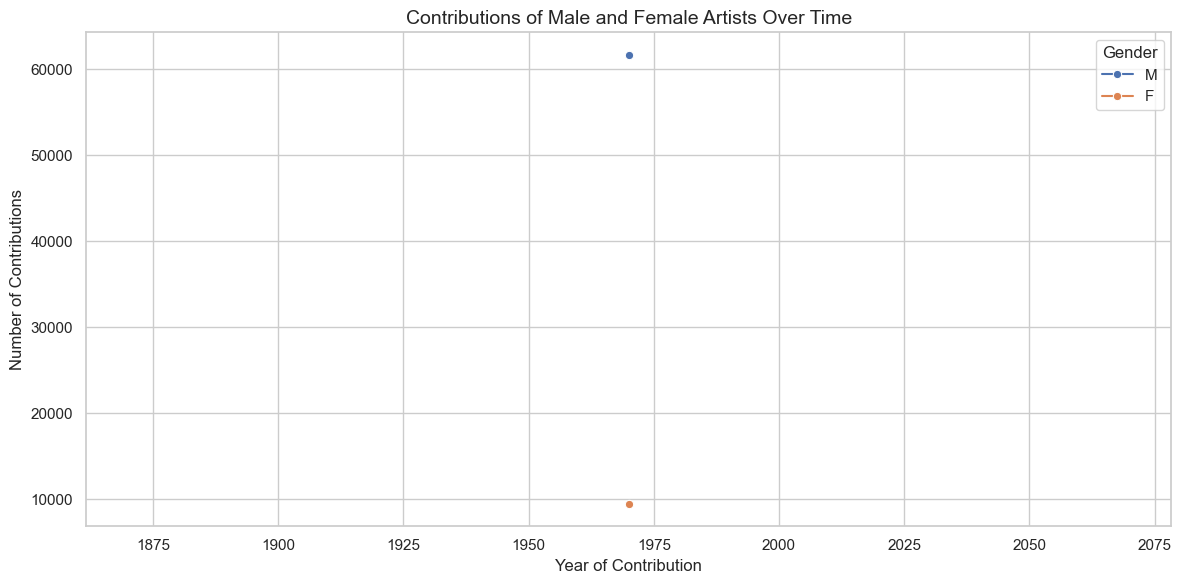

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'year_of_contribution' is a datetime type
df['year_of_contribution'] = pd.to_datetime(df['e.startdate'], errors='coerce').dt.year

# Create a column that will be used to identify each contribution
df['contribution'] = 1  # Each row is a contribution

# Set the style of the plot
sns.set(style="whitegrid")

# Create a plot to compare contributions by gender over time
plt.figure(figsize=(12, 6))

# Plot the individual contributions by gender and year (without grouping)
sns.lineplot(data=df, x='year_of_contribution', y='contribution', hue='a.gender', estimator='sum', marker='o')

# Customize the plot
plt.title('Contributions of Male and Female Artists Over Time', fontsize=14)
plt.xlabel('Year of Contribution', fontsize=12)
plt.ylabel('Number of Contributions', fontsize=12)
plt.legend(title='Gender')

# Display the plot
plt.tight_layout()
plt.show()

In [25]:
df['e.year'] = pd.to_datetime(df['e.startdate'], format='%Y-%m-%d', errors='coerce').dt.year


In [26]:
df = df[~df['e.startdate'].isin(['unknown', 'N/A', 'invalid'])]


In [27]:
df['e.year'] = pd.to_datetime(df['e.startdate'], errors='coerce').dt.year
print(f"Rows with missing years: {df['e.year'].isna().sum()}")


Rows with missing years: 0


In [28]:
print(df['e.year'].unique())
print(df['e.year'].value_counts())


[1970]
e.year
1970    72078
Name: count, dtype: int64


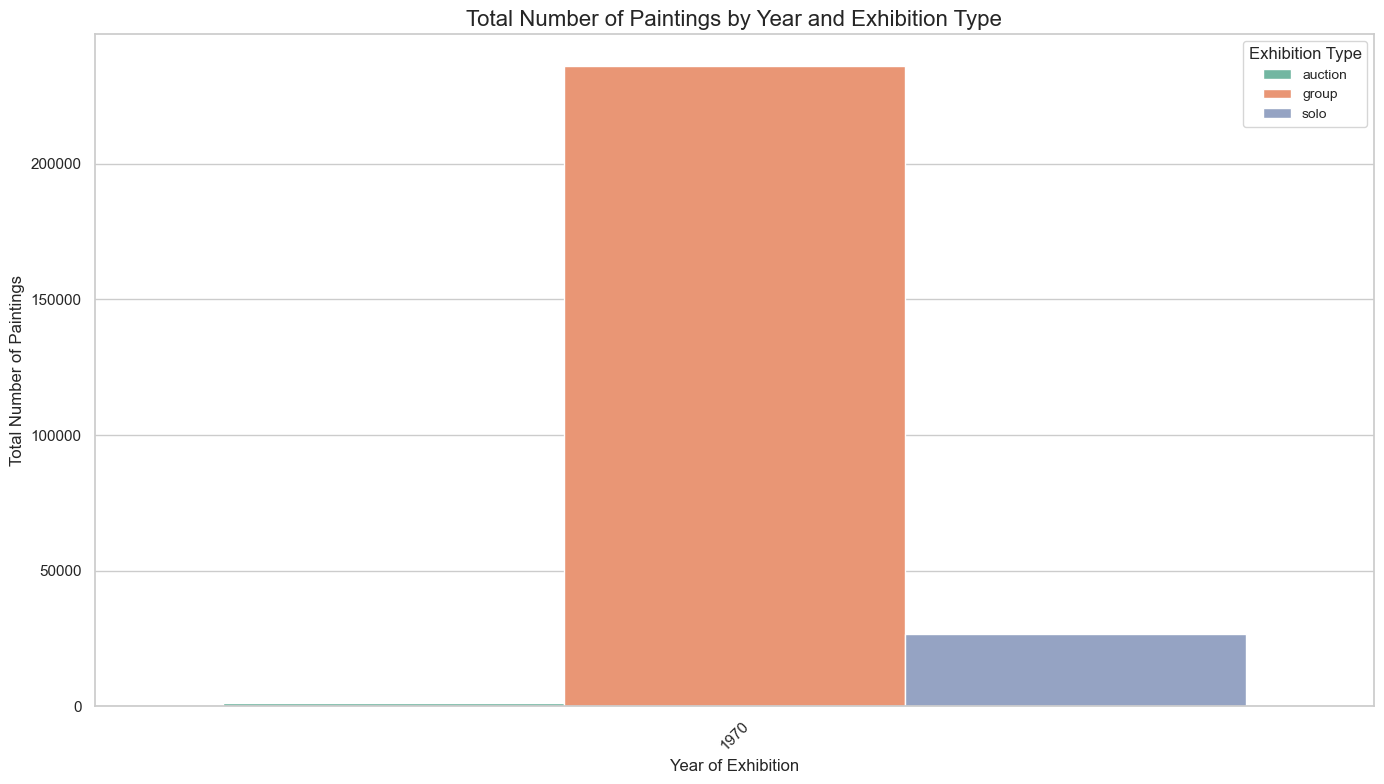

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'e.startdate' is converted to a datetime object and extract the year
#df['e.year'] = pd.to_datetime(df['e.startdate'], errors='coerce').dt.year

# Filter rows with valid years and non-null values for 'e.paintings' and 'e.type'
df_clean = df.dropna(subset=['e.startdate', 'e.paintings', 'e.type'])

# Convert 'e.paintings' to numeric (in case it's not)
df_clean['e.paintings'] = pd.to_numeric(df_clean['e.paintings'], errors='coerce')

# Create a new column for the year
df_clean['e.year'] = pd.to_datetime(df_clean['e.startdate'], errors='coerce').dt.year

# Set the style for the plot
sns.set(style="whitegrid")

# Aggregate paintings by year and type
df_grouped = df_clean.groupby(['e.year', 'e.type'], as_index=False)['e.paintings'].sum()

# Create a bar plot
plt.figure(figsize=(14, 8))
sns.barplot(
    data=df_grouped,
    x='e.year',
    y='e.paintings',
    hue='e.type',
    palette='Set2'
)

# Customize the plot
plt.title('Total Number of Paintings by Year and Exhibition Type', fontsize=16)
plt.xlabel('Year of Exhibition', fontsize=12)
plt.ylabel('Total Number of Paintings', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Exhibition Type', fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()


In [30]:
import pandas as pd

# Count the occurrences of each unique value in 'e.type'
exhibition_type_counts = df['e.type'].value_counts()

# Display the result
print(exhibition_type_counts)


e.type
group      71222
auction      481
solo         375
Name: count, dtype: int64


<Figure size 1200x600 with 0 Axes>

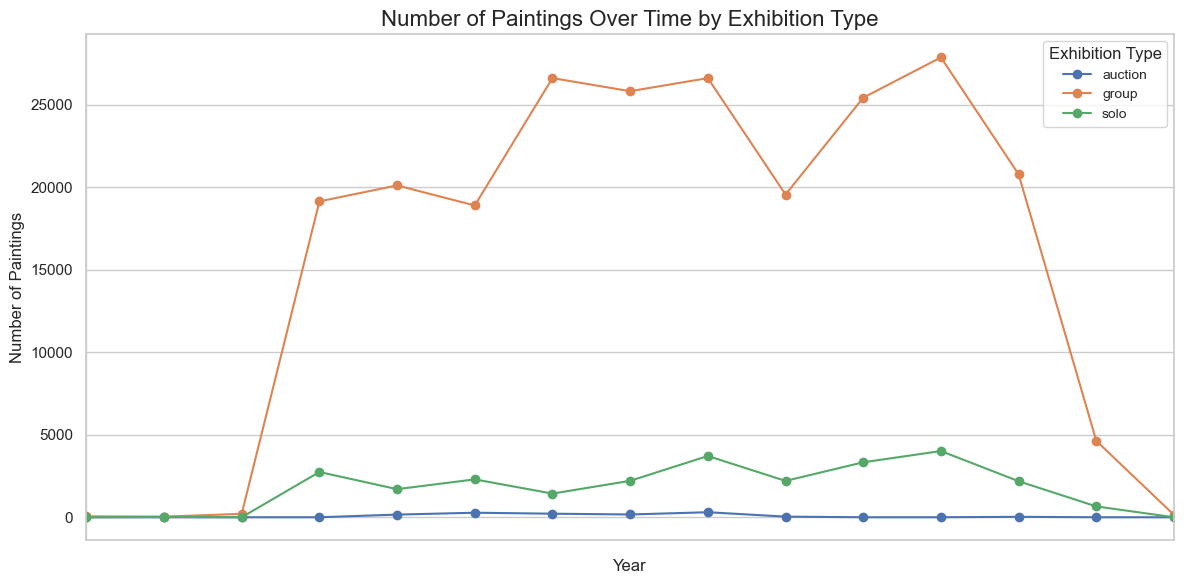

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# # Ensure 'e.startdate' is converted to a datetime object
# df['e.startdate'] = pd.to_datetime(df['e.startdate'], errors='coerce')

# # Extract the year from 'e.startdate'
# df['e.year'] = df['e.startdate'].dt.year

# Convert 'e.paintings' to numeric (if necessary)
df['e.paintings'] = pd.to_numeric(df['e.paintings'], errors='coerce')

# Use pivot_table to sum the paintings by 'e.year' and 'e.type'
paintings_by_year_and_type = df.pivot_table(values='e.paintings', index='e.startdate', columns='e.type', aggfunc='sum', fill_value=0)

# Set the seaborn style for plotting
sns.set(style="whitegrid")

# Plot the number of paintings over time by exhibition type
plt.figure(figsize=(12, 6))
paintings_by_year_and_type.plot(kind='line', marker='o', figsize=(12, 6))

# Customize the plot
plt.title('Number of Paintings Over Time by Exhibition Type', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Paintings', fontsize=12)
plt.grid(True)
plt.legend(title='Exhibition Type', fontsize=10)

# Display the plot
plt.tight_layout()
plt.show();


AttributeError: PolyCollection.set() got an unexpected keyword argument 'marker'

<Figure size 1200x600 with 0 Axes>

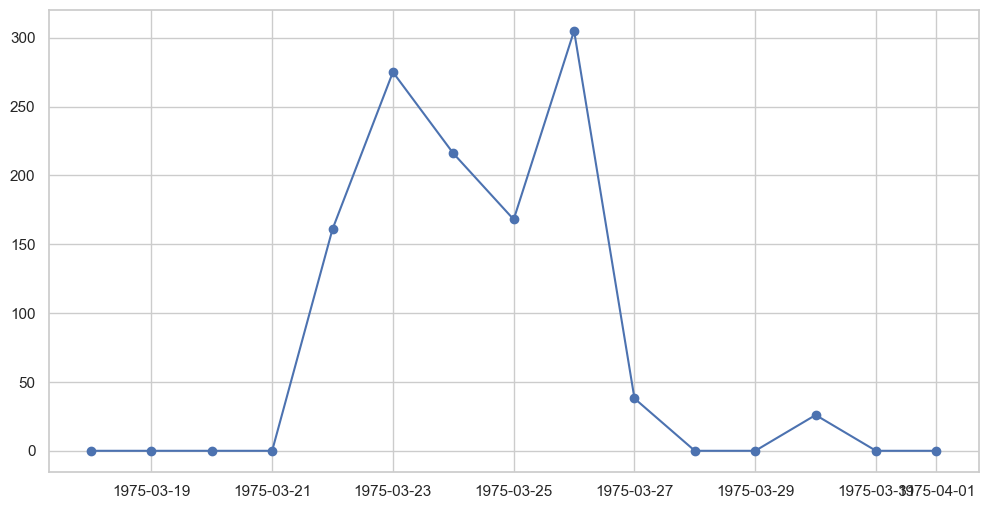

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Convert 'e.paintings' to numeric (if necessary)
df['e.paintings'] = pd.to_numeric(df['e.paintings'], errors='coerce')

# Use pivot_table to sum the paintings by 'e.year' and 'e.type'
paintings_by_year_and_type = df.pivot_table(values='e.paintings', index='e.startdate', columns='e.type', aggfunc='sum', fill_value=0)

# Set the seaborn style for plotting
sns.set(style="whitegrid")

# Plot the number of paintings over time by exhibition type using a stacked line plot
plt.figure(figsize=(12, 6))
paintings_by_year_and_type.plot(kind='area', stacked=True, marker='o', figsize=(12, 6))

# Customize the plot
plt.title('Number of Paintings Over Time by Exhibition Type', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Paintings', fontsize=12)
plt.grid(True)
plt.legend(title='Exhibition Type', fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()


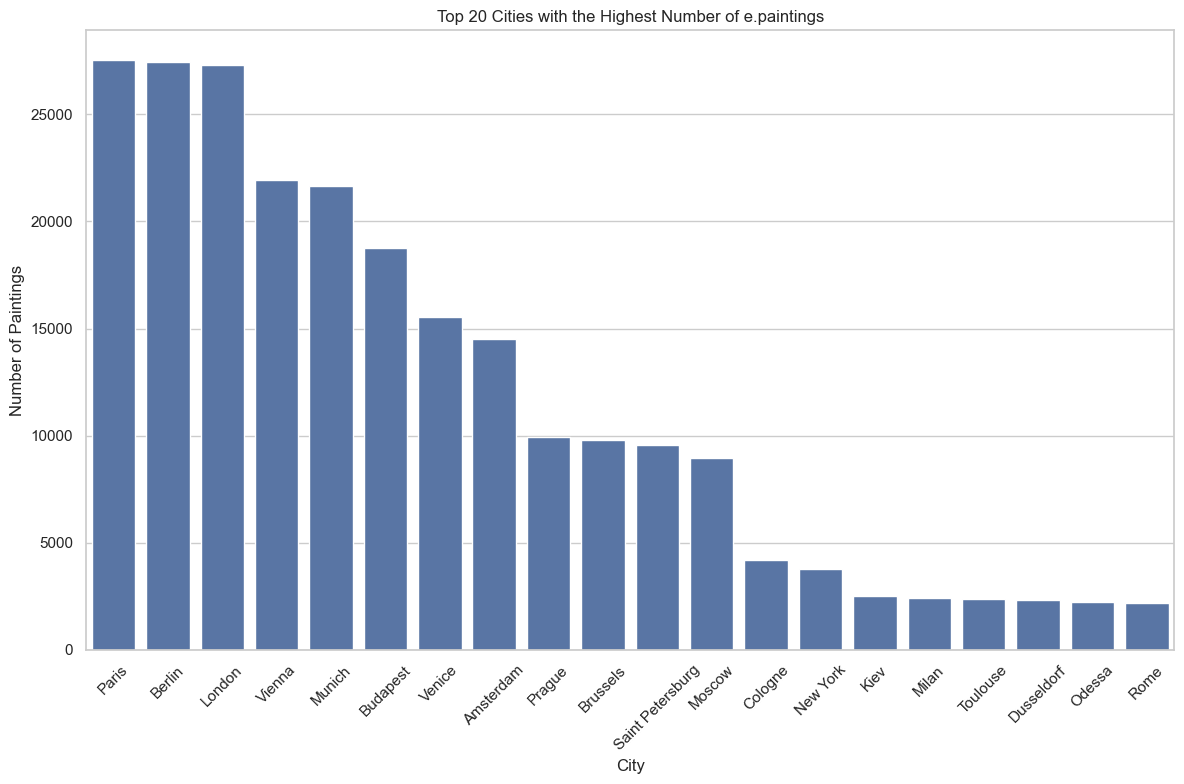

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grouping the data by 'e.city' and summing the 'e.paintings' values (assuming 'e.paintings' is numeric)
# If 'e.paintings' is categorical and you want to count occurrences, use .size() instead of sum().
top_cities = df.groupby('e.city')['e.paintings'].sum().reset_index()

# Sorting the values in descending order and selecting the top 20 cities
top_cities_sorted = top_cities.sort_values(by='e.paintings', ascending=False).head(20)

# Set the plot size
plt.figure(figsize=(12, 8))

# Create a bar plot for the top 20 cities with respect to the number of paintings
sns.barplot(data=top_cities_sorted, x='e.city', y='e.paintings')

# Title and labels
plt.title('Top 20 Cities with the Highest Number of e.paintings')
plt.xlabel('City')
plt.ylabel('Number of Paintings')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


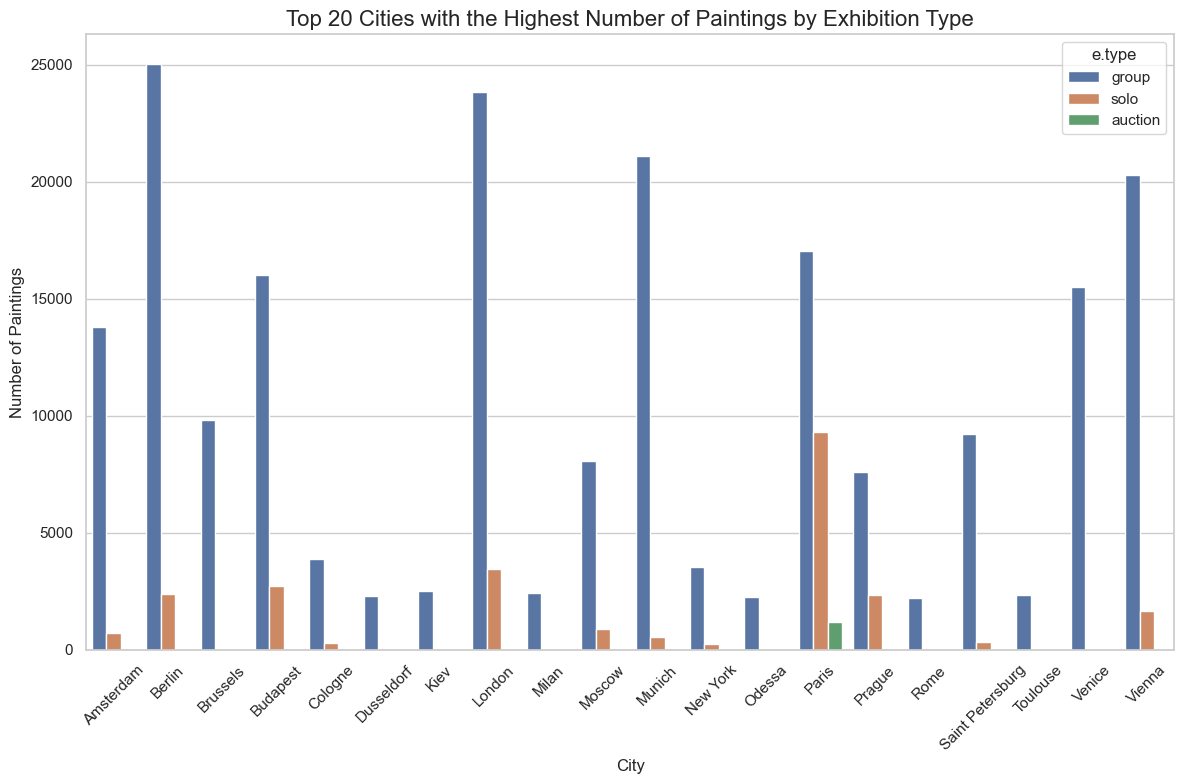

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grouping the data by 'e.city' and 'e.type', and summing the 'e.paintings' values
top_cities_type = df.groupby(['e.city', 'e.type'])['e.paintings'].sum().reset_index()

# Sorting the cities based on the total number of paintings in descending order and selecting the top 20 cities
top_cities_sorted = top_cities_type.groupby('e.city')['e.paintings'].sum().reset_index()
top_cities_sorted = top_cities_sorted.sort_values(by='e.paintings', ascending=False).head(20)

# Filter the top cities' data from the top_cities_type dataset
top_cities_data = top_cities_type[top_cities_type['e.city'].isin(top_cities_sorted['e.city'])]

# Set the plot size
plt.figure(figsize=(12, 8))

# Create a bar plot for the top 20 cities with respect to the number of paintings, split by exhibition type
sns.barplot(data=top_cities_data, x='e.city', y='e.paintings', hue='e.type')

# Title and labels
plt.title('Top 20 Cities with the Highest Number of Paintings by Exhibition Type', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Number of Paintings', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


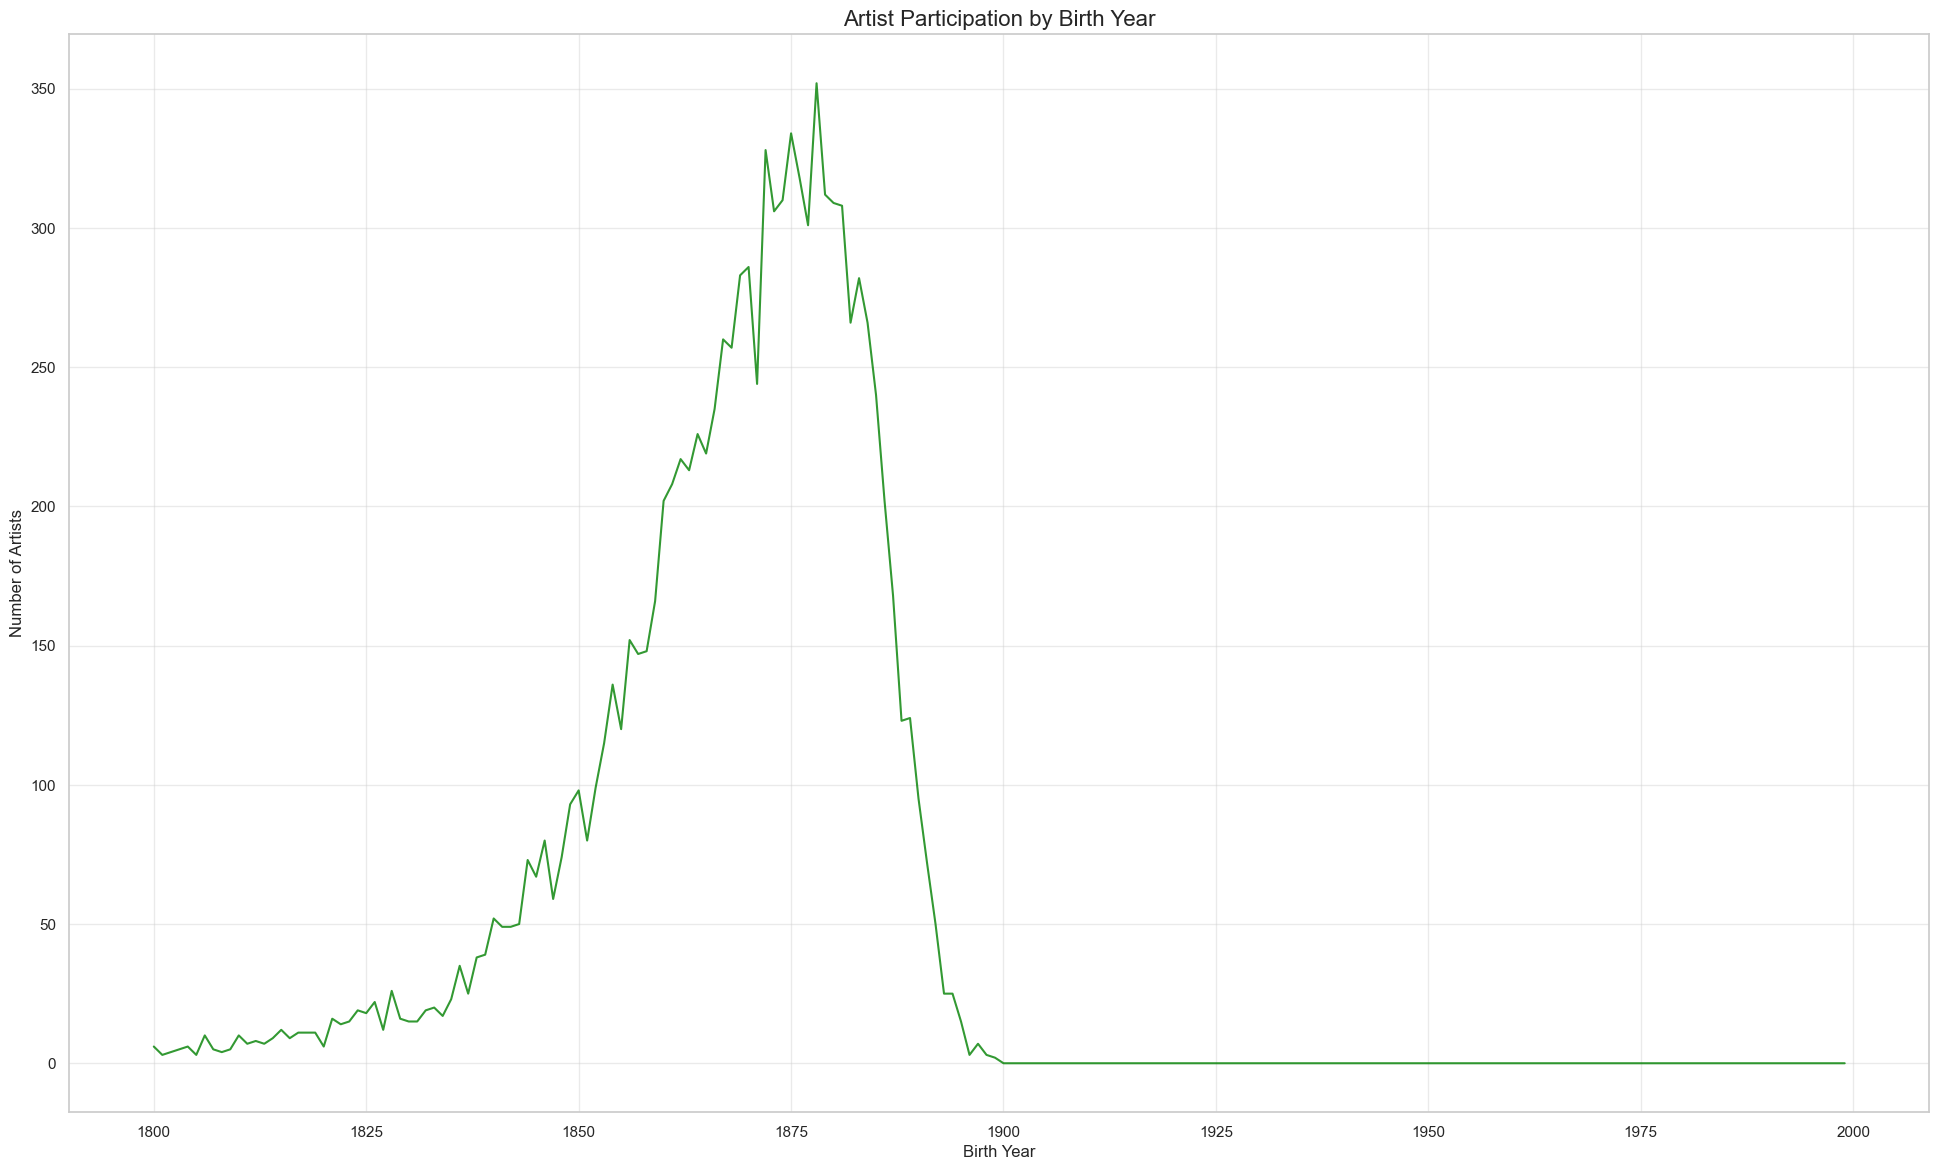

In [56]:
import numpy as np

# Ensure 'a.birthdate' is a datetime field and extract year
df['a.birthdate'] = pd.to_datetime(df['a.birthdate'], errors='coerce')
df['birth_year'] = df['a.birthdate'].dt.year

# Group by birth year and count unique artists
birth_year_counts = df.groupby('birth_year')['a.name'].nunique()

# Define the full range of years (1800-2000)
full_years = np.arange(1800, 2000)

# Reindex the birth_year_counts to include all years, filling missing values with 0
birth_year_counts = birth_year_counts.reindex(full_years, fill_value=0)

# Plotting the data
plt.figure(figsize=(24, 14))
birth_year_counts.plot(kind='line', color='green', alpha=0.8)
plt.title('Artist Participation by Birth Year', fontsize=16)
plt.xlabel('Birth Year', fontsize=12)
plt.ylabel('Number of Artists', fontsize=12)
plt.grid(alpha=0.4)
plt.show()

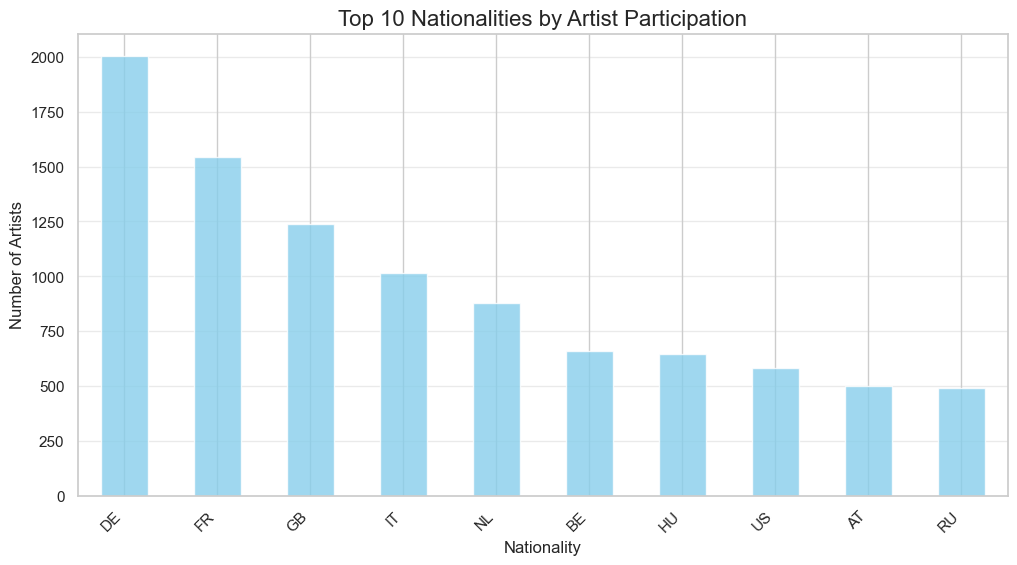

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by nationality and count the number of unique artists
nationality_counts = df.groupby('a.nationality')['a.name'].nunique().sort_values(ascending=False)

# Select top 10 nationalities for clarity
top_nationalities = nationality_counts.head(10)

# Plotting the data
plt.figure(figsize=(12, 6))
top_nationalities.plot(kind='bar', color='skyblue', alpha=0.8)
plt.title('Top 10 Nationalities by Artist Participation', fontsize=16)
plt.xlabel('Nationality', fontsize=12)
plt.ylabel('Number of Artists', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.4)
plt.show()


In [58]:
# Group by 'e.country', 'e.paintings', and 'e.type', then count unique artists within each group
artist_count_by_group = df.groupby(['e.country', 'e.paintings', 'e.type'])['a.name'].nunique().reset_index(name='unique_artist_count')

# Display the result
print(artist_count_by_group)


    e.country  e.paintings e.type  unique_artist_count
0          AT            1  group                  649
1          AT            1   solo                    1
2          AT            2  group                  383
3          AT            3  group                  222
4          AT            4  group                  144
..        ...          ...    ...                  ...
904        US           44   solo                    1
905        US           47   solo                    1
906        US           58  group                    1
907        US           64  group                    1
908        US           70   solo                    1

[909 rows x 4 columns]


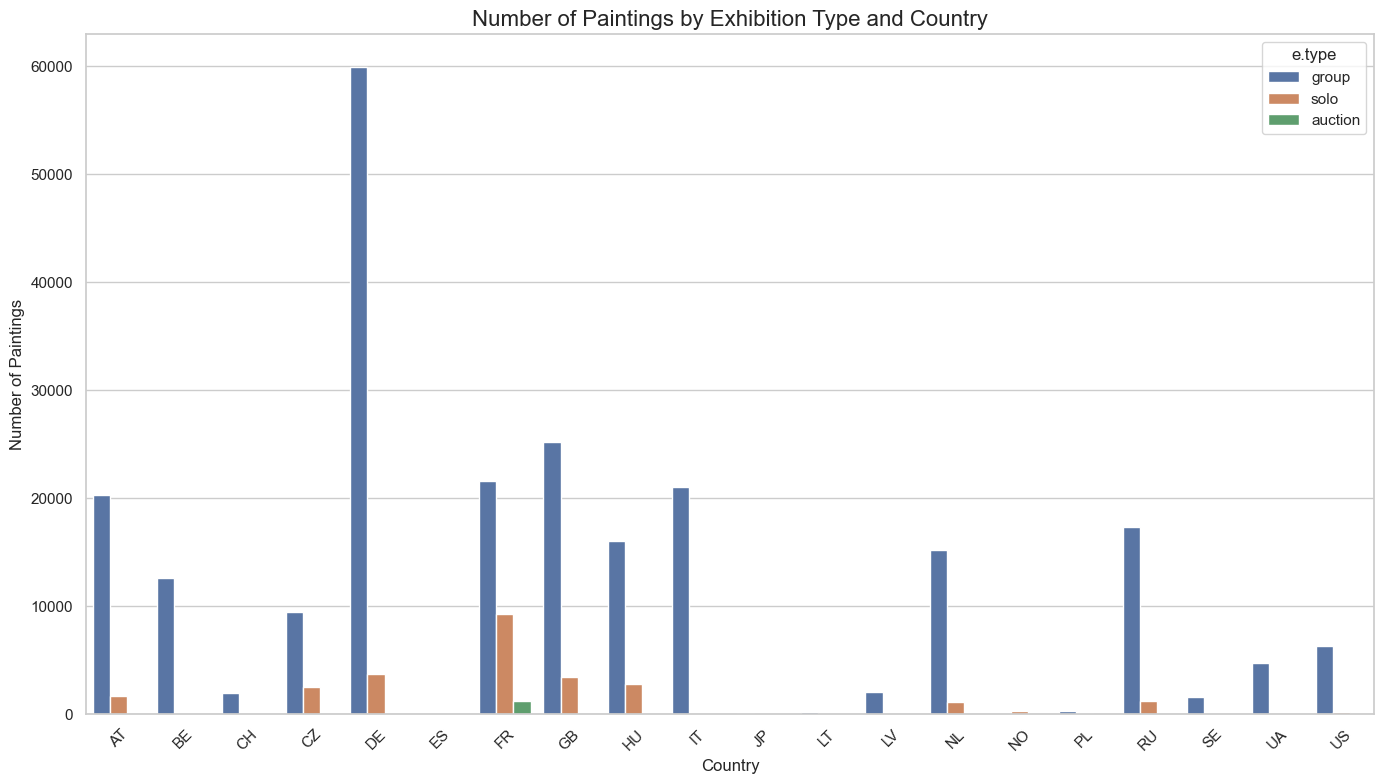

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'e.country', 'e.type', and sum 'e.paintings'
country_type_paintings = df.groupby(['e.country', 'e.type'])['e.paintings'].sum().reset_index()

# Set the seaborn style for the plot
sns.set(style="whitegrid")

# Set the plot size
plt.figure(figsize=(14, 8))

# Create a grouped bar plot
sns.barplot(data=country_type_paintings, x='e.country', y='e.paintings', hue='e.type')

# Customize the plot
plt.title('Number of Paintings by Exhibition Type and Country', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Paintings', fontsize=12)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


In [61]:
import pandas as pd

# Group by artist name and sum the number of paintings
paintings_by_artist = df.groupby('a.name')['e.paintings'].sum().reset_index()

# Sort by the number of paintings in descending order
paintings_by_artist = paintings_by_artist.sort_values(by='e.paintings', ascending=False)

# Display the result
print(paintings_by_artist)


                         a.name  e.paintings
12345          Vincent van Gogh         2978
347              Albert Besnard         1869
3062               Edvard Munch         1663
9989         Natalia Goncharova         1360
4064           Ferdinand Hodler          957
...                         ...          ...
5262            Giovanni Secchi            1
5265        Giovanni Todeschini            1
5266   Giovanni Trussardi Volpi            1
5270          Giovannina Rubini            1
6633               Isabel Cohen            1

[13266 rows x 2 columns]


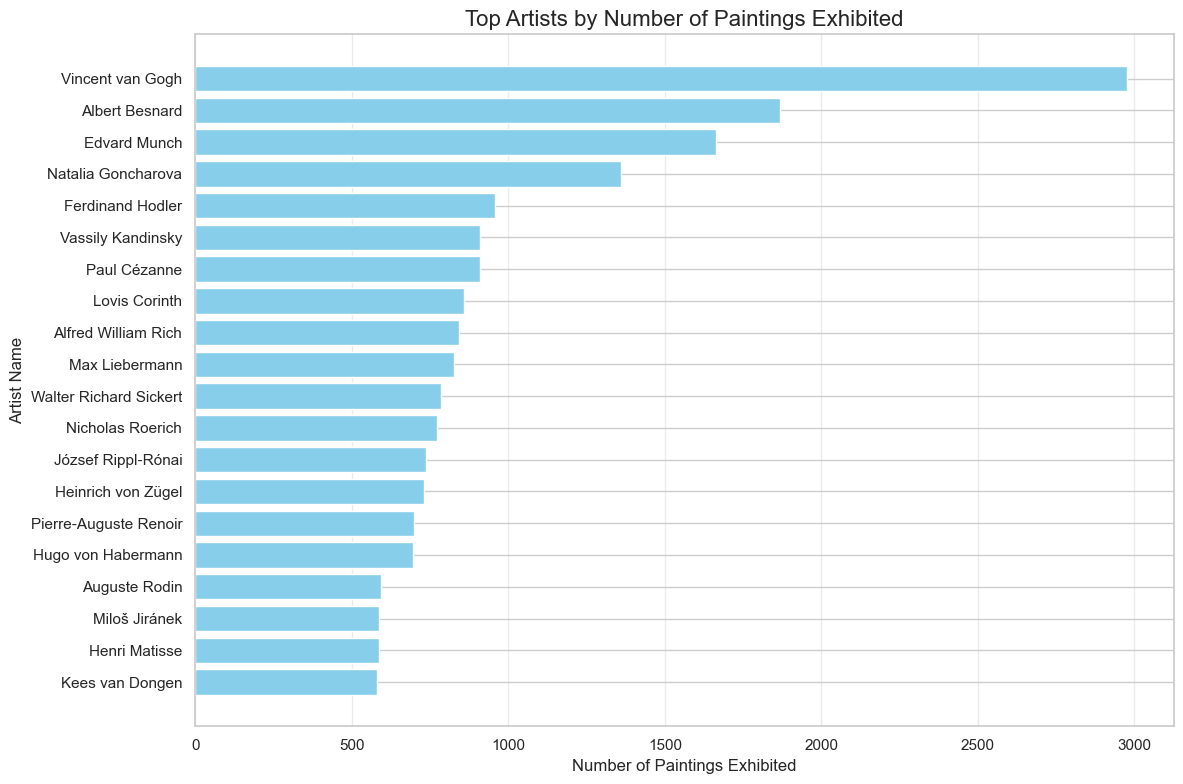

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# Optional filtering: Uncomment and modify as needed
# df = df[df['a.gender'] == 'M']  # Filter by gender (e.g., Male)
# df = df[df['a.nationality'] == 'GB']  # Filter by nationality (e.g., British)

# Group by artist name and sum the number of paintings exhibited
artist_paintings = df.groupby('a.name')['e.paintings'].sum().reset_index()

# Sort by the number of paintings in descending order
artist_paintings = artist_paintings.sort_values(by='e.paintings', ascending=False).head(20)  # Top 20 artists

# Plotting the horizontal bar chart
plt.figure(figsize=(12, 8))
plt.barh(artist_paintings['a.name'], artist_paintings['e.paintings'], color='skyblue')

# Adding labels and title
plt.title('Top Artists by Number of Paintings Exhibited', fontsize=16)
plt.xlabel('Number of Paintings Exhibited', fontsize=12)
plt.ylabel('Artist Name', fontsize=12)
plt.gca().invert_yaxis()  # Invert Y-axis for better readability
plt.grid(axis='x', alpha=0.4)

# Display the plot
plt.tight_layout()
plt.show()

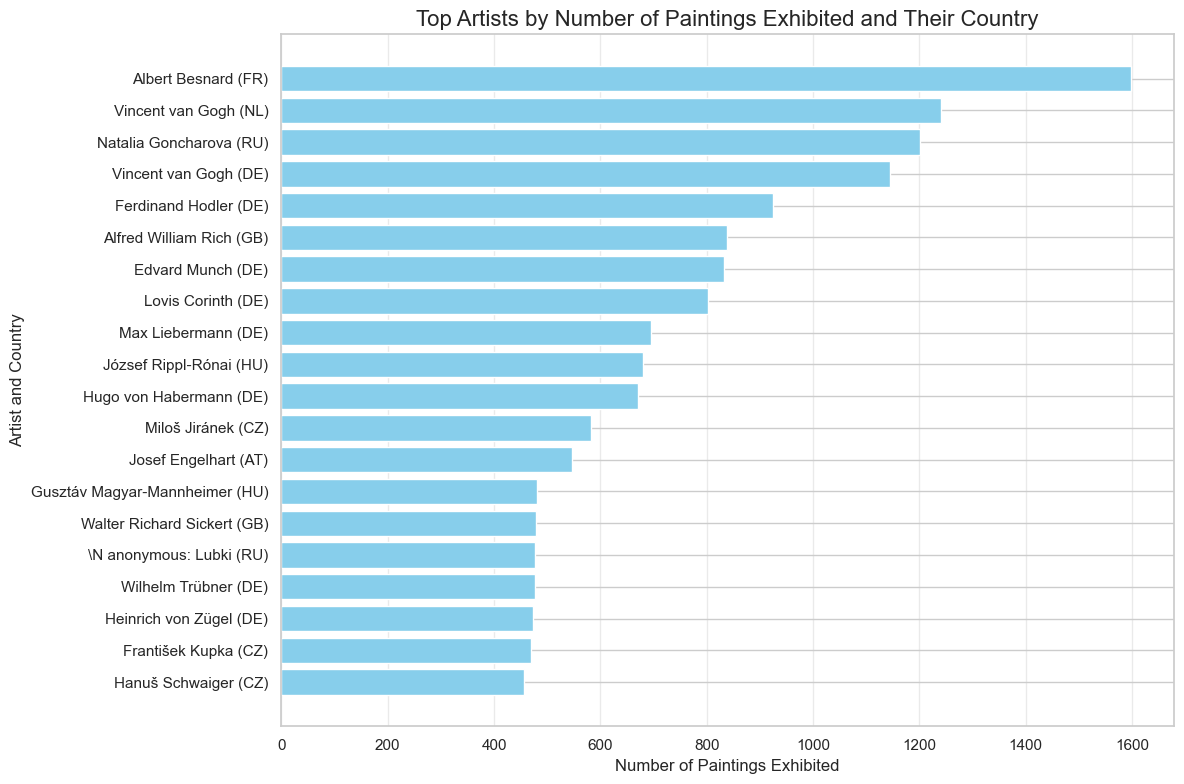

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by artist name and country, and sum the number of paintings exhibited
artist_paintings_by_country = df.groupby(['a.name', 'e.country'])['e.paintings'].sum().reset_index()

# Sort by the number of paintings in descending order
artist_paintings_by_country = artist_paintings_by_country.sort_values(by='e.paintings', ascending=False).head(20)  # Top 20 artists

# Plotting the horizontal bar chart
plt.figure(figsize=(12, 8))
# Create a combined label of artist name and country for better display
artist_paintings_by_country['artist_country'] = artist_paintings_by_country['a.name'] + ' (' + artist_paintings_by_country['e.country'] + ')'

# Plot the data with combined artist and country label
plt.barh(artist_paintings_by_country['artist_country'], artist_paintings_by_country['e.paintings'], color='skyblue')

# Adding labels and title
plt.title('Top Artists by Number of Paintings Exhibited and Their Country', fontsize=16)
plt.xlabel('Number of Paintings Exhibited', fontsize=12)
plt.ylabel('Artist and Country', fontsize=12)
plt.gca().invert_yaxis()  # Invert Y-axis for better readability
plt.grid(axis='x', alpha=0.4)

# Display the plot
plt.tight_layout()
plt.show()


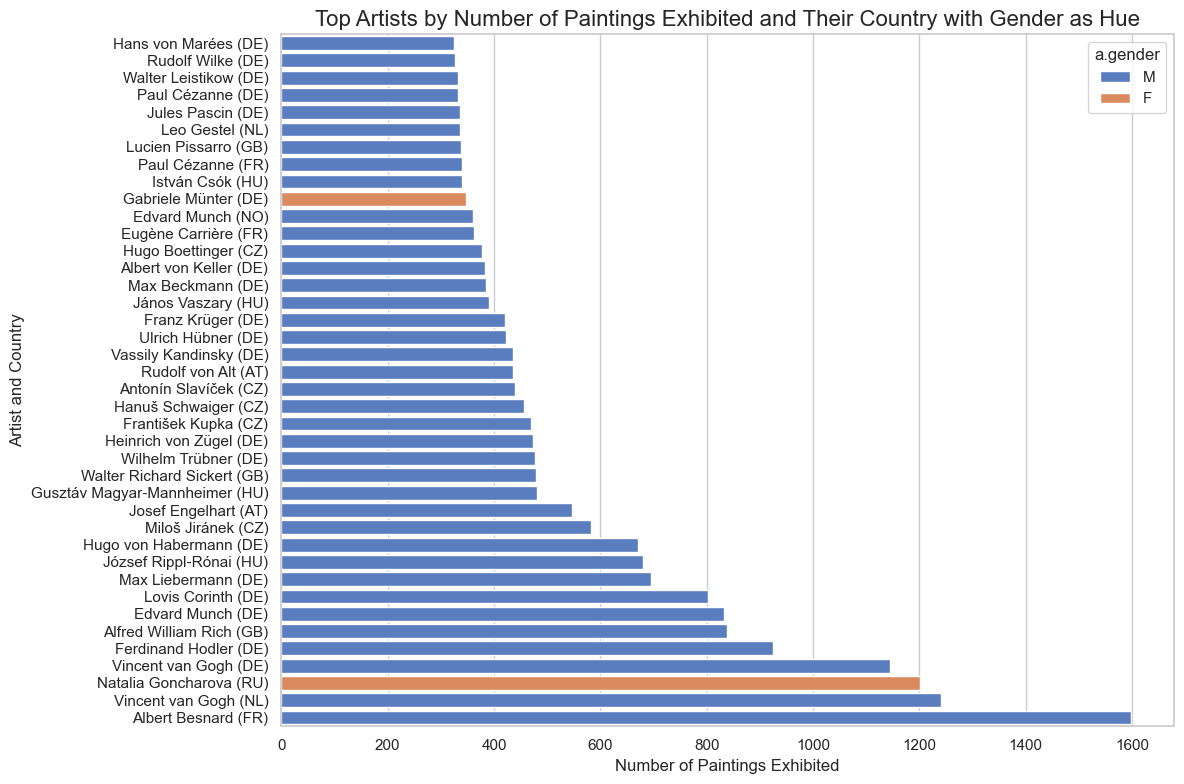

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group by artist name, country, and gender, and sum the number of paintings exhibited
artist_paintings_by_gender_country = df.groupby(['a.name', 'e.country', 'a.gender'])['e.paintings'].sum().reset_index()

# Sort by the number of paintings in descending order
artist_paintings_by_gender_country = artist_paintings_by_gender_country.sort_values(by='e.paintings', ascending=False).head(40)  # Top 20 artists

# Create a combined label of artist name and country for better display
artist_paintings_by_gender_country['artist_country'] = artist_paintings_by_gender_country['a.name'] + ' (' + artist_paintings_by_gender_country['e.country'] + ')'

# Set the seaborn style for the plot
sns.set(style="whitegrid")

# Set the plot size
plt.figure(figsize=(12, 8))

# Create a horizontal bar plot with gender as hue
sns.barplot(data=artist_paintings_by_gender_country, x='e.paintings', y='artist_country', hue='a.gender', palette='muted')

# Adding labels and title
plt.title('Top Artists by Number of Paintings Exhibited and Their Country with Gender as Hue', fontsize=16)
plt.xlabel('Number of Paintings Exhibited', fontsize=12)
plt.ylabel('Artist and Country', fontsize=12)

# Invert Y-axis for better readability
plt.gca().invert_yaxis()

# Show the plot
plt.tight_layout()
plt.show()


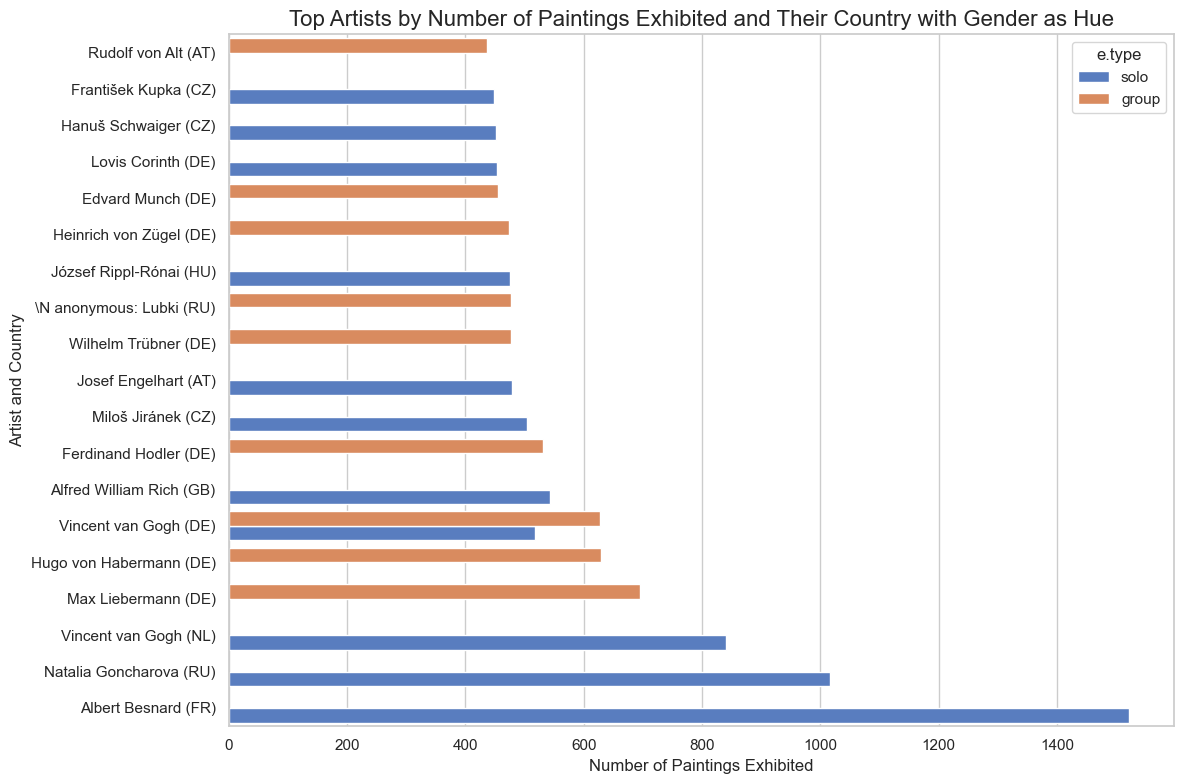

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group by artist name, country, and gender, and sum the number of paintings exhibited
artist_paintings_by_gender_country = df.groupby(['a.name', 'e.country', 'e.type'])['e.paintings'].sum().reset_index()

# Sort by the number of paintings in descending order
artist_paintings_by_gender_country = artist_paintings_by_gender_country.sort_values(by='e.paintings', ascending=False).head(20)  # Top 20 artists

# Create a combined label of artist name and country for better display
artist_paintings_by_gender_country['artist_country'] = artist_paintings_by_gender_country['a.name'] + ' (' + artist_paintings_by_gender_country['e.country'] + ')'

# Set the seaborn style for the plot
sns.set(style="whitegrid")

# Set the plot size
plt.figure(figsize=(12, 8))

# Create a horizontal bar plot with gender as hue
sns.barplot(data=artist_paintings_by_gender_country, x='e.paintings', y='artist_country', hue='e.type', palette='muted')

# Adding labels and title
plt.title('Top Artists by Number of Paintings Exhibited and Their Country with Gender as Hue', fontsize=16)
plt.xlabel('Number of Paintings Exhibited', fontsize=12)
plt.ylabel('Artist and Country', fontsize=12)

# Invert Y-axis for better readability
plt.gca().invert_yaxis()

# Show the plot
plt.tight_layout()
plt.show()


In [77]:
import folium
from folium.plugins import MarkerCluster
import pandas as pd

# Ensure 'e.latitude' and 'e.longitude' are numeric
df['e.latitude'] = pd.to_numeric(df['e.latitude'], errors='coerce')
df['e.longitude'] = pd.to_numeric(df['e.longitude'], errors='coerce')

# Filter out rows with missing or invalid coordinates
df_cleaned = df.dropna(subset=['e.latitude', 'e.longitude'])

# Initialize a folium map
map_exhibitions = folium.Map(location=[0, 0], zoom_start=2)

# Add marker cluster
marker_cluster = MarkerCluster().add_to(map_exhibitions)

# Group by location to aggregate exhibitions
grouped = df_cleaned.groupby(['e.latitude', 'e.longitude']).size().reset_index(name='count')

# Add markers to the map
for _, row in grouped.iterrows():
    lat, lon, count = row['e.latitude'], row['e.longitude'], row['count']
    popup_text = f"Location: ({lat:.2f}, {lon:.2f})<br>Number of Exhibitions: {count}"
    folium.CircleMarker(
        location=[lat, lon],
        radius=min(count, 10),  # Limit the size for clarity
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6,
        tooltip=popup_text
    ).add_to(marker_cluster)

# Save and display map
map_exhibitions.save('geographic_spread_map.html')
map_exhibitions

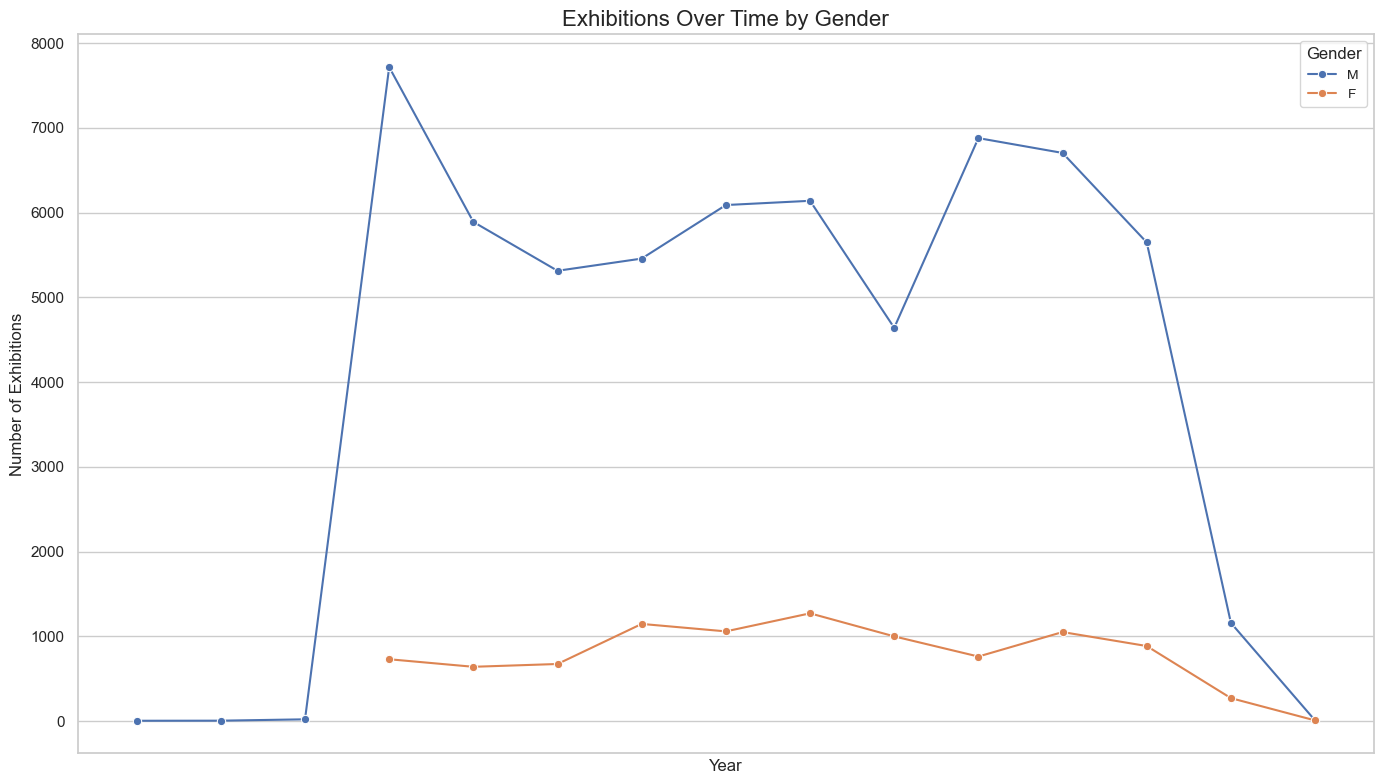

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'e.startdate' is converted to a datetime object
# df['e.startdate'] = pd.to_datetime(df['e.startdate'], errors='coerce')

# Extract the year from 'e.startdate'
# df['e.year'] = df['e.startdate'].dt.year

# Group by year and gender to count exhibitions
# gender_yearly_counts = df.groupby(['e.year', 'a.gender']).size().reset_index(name='count')

# Set the seaborn style
sns.set(style="whitegrid")

# Plot the data
plt.figure(figsize=(14, 8))
sns.lineplot(data=gender_yearly_counts, x='e.startdate', y='count', hue='a.gender', marker='o')

# Customize the plot
plt.title('Exhibitions Over Time by Gender', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Exhibitions', fontsize=12)
plt.legend(title='Gender', fontsize=10)
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
# Sum paintings by artist and venue
paintings_by_artist_venue = df.groupby(['e.venue', 'a.name'])['e.paintings'].sum().unstack(fill_value=0)

# Plot
paintings_by_artist_venue.plot(
    kind='bar',
    stacked=True,
    figsize=(16, 10),
    colormap='tab20'
)

# Customize the plot
plt.title('Number of Paintings by Artist and Venue', fontsize=16)
plt.xlabel('Exhibition Venue', fontsize=12)
plt.ylabel('Number of Paintings', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Artist Name', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()
